### Problem Set 2

### Question 1
Consider the following Python module:

    a = 0
    
    def b():
        global a
        a = c(a)

    def c(a):
        return a + 2

After importing the module into the interpreter, you execute:

    >>> b()
    >>> b()
    >>> b()
    >>> a
    ?

What value is displayed when the last expression (a) is evaluated? Explain your answer by indicating what happens in every executed statement.

In [1]:
a = 0

def b():
    global a
    a = c(a)

def c(a):
    return a + 2

    # a = 0
b() # a += 2, a = 2
b() # a += 2, a = 4
b() # a += 2, a = 6
a

### Question 2
Function fileLength(), given to you, takes the name of a file as input and returns the length of the file:

    >>> fileLength('midterm.py')
    284
    >>> fileLength('idterm.py')
    Traceback (most recent call last):
      File "<pyshell#34>", line 1, in <module>
        fileLength('idterm.py')
      File "/Users/me/midterm.py", line 3, in fileLength
        infile = open(filename)
    FileNotFoundError: [Errno 2] No such file or directory: 'idterm.py'

As shown above, if the file cannot be found by the interpreter or if it cannot be read as a text file, an exception will be raised. Modify function fileLength() so that a friendly message is printed instead:

    >>> fileLength('midterm.py')
    358
    >>> fileLength('idterm.py')
    File idterm.py not found.

In [2]:
def file_length(file_name):
    try:
        file = open(file_name)
        contents = file.read()
        file.close()
        print(len(contents))
    except FileNotFoundError:
        print(f'File {file_name} not found.')
        
file_length('ps2.py')

### Question 3
Write a class named Marsupial that can be used as shown below:

    >>> m = Marsupial()
    >>> m.put_in_pouch('doll')
    >>> m.put_in_pouch('firetruck')
    >>> m.put_in_pouch('kitten')
    >>> m.pouch_contents()
    ['doll', 'firetruck', 'kitten']

Now write a class named Kangaroo as a subclass of Marsupial that inherits all the attributes of Marsupial and also:

a.	_extends the Marsupial \_\_init\_\_ constructor to take, as input, the coordinates x and y of the Kangaroo object,

b. _supports method jump that takes number values dx and dy as input and moves the kangaroo by dx units along the x-axis and by dy units along the y-axis, and

c.	_overloads the \_\_str__ operator so it behaves as shown below.

    >>> k = Kangaroo(0,0)
    >>> print(k)
    I am a Kangaroo located at coordinates (0,0)
    >>> k.put_in_pouch('doll')
    >>> k.put_in_pouch('firetruck')
    >>> k.put_in_pouch('kitten')
    >>> k.pouch_contents()
    ['doll', 'firetruck', 'kitten']
    >>> k.jump(1,0)
    >>> k.jump(1,0)
    >>> k.jump(1,0)
    >>> print(k)
    I am a Kangaroo located at coordinates (3,0)


In [3]:
class Marsupial:
    
    def __init__(self):
        self.contents = []
    
    def put_in_pouch(self, item):
        self.contents.append(item)
        
    def pouch_contents(self):
        print(self.contents)
        
m = Marsupial()
m.put_in_pouch('doll')
m.put_in_pouch('firetruck')
m.put_in_pouch('kitten')
m.pouch_contents()

In [4]:
class Kangaroo(Marsupial):
    
    def __init__(self, x, y):
        self.contents = []
        self.x = x
        self.y = y
        
    def jump(self, dx, dy):
        self.x += dx
        self.y += dy
        
    def __str__(self):
        return f'I am a Kangaroo located at coordinates ({self.x}, {self.y})'
        
k = Kangaroo(0,0)
print(k)

k.put_in_pouch('doll')
k.put_in_pouch('firetruck')
k.put_in_pouch('kitten')
k.pouch_contents()

k.jump(1,0)
k.jump(1,0)
k.jump(1,0)
print(k)

### Question 4
Implement a new GUI class App that combines user-defined tkinter widget classes Calculator and Mortgage displayed below: (This question can be done using a .py file)

Your GUI should look like this:

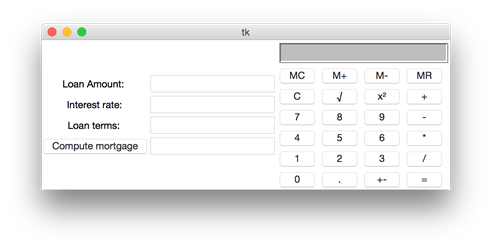

In [5]:
import tkinter as tk

class Calculator(tk.Frame):
    
    def __init__(self, parent=None):
        tk.Frame.__init__(self, parent)
        self.x, self.y = 75, 50

    
        root = tk.Frame(self)
        root.pack(side=tk.RIGHT)

        display = tk.Entry(root, relief = 'ridge', borderwidth=5, width=35, background='gray')
        display.grid(row=0, columnspan=4)

        # buttons grid
        buttons = [['MC', 'M+', 'M-', 'MR'],
                   ['C', '\u221A', 'x\u00B2', '+'],
                   ['7', '8', '9', '-'],
                   ['4', '5', '6', '*'],
                   ['1', '2', '3', '/'],
                   ['0', '.', '+-', '=']] 
        for i in range(6):
            for j in range(4):
                # create button
                button = tk.Button(root, padx=10, text=buttons[i][j], width=2, height=1)
                # put button in place
                button.grid(row=i+1, column=j, padx=5, pady=5)

        #root.mainloop()

In [6]:
class Mortgage(tk.Frame):
    
    def __init__(self, parent=None):
        tk.Frame.__init__(self, parent)
        self.x, self.y = 75, 50

    
        root = tk.Frame(self)
        root.pack(side=tk.LEFT)

        labels = ['Loan amount:', 'Interest Rate:', 'Loan terms:']

        for i in range(len(labels)):
            label = tk.Label(root, padx=10, pady=2, text=labels[i])
            label.grid(row=i, column=0)

            entry = tk.Entry(root, width=25)
            entry.grid(row=i, column=1)

        button = tk.Button(root, text='Compute mortgage', height=1)
        button.grid(row=3, column=0, pady=2, padx=10)

        entry = tk.Entry(root, width=25)
        entry.grid(row=3, column=1)

        #root.mainloop()

In [7]:
class App(tk.Frame):
    
    def __init__(self, master):
        tk.Frame.__init__(self, master)
        mort = Mortgage(self)
        mort.pack(side=tk.LEFT)
        calc = Calculator(self)
        calc.pack(side=tk.RIGHT)

In [8]:
root = tk.Tk()
app = App(root)
app.pack()
root.mainloop()

### Question 5
Write function collatz() that takes a positive integer x as input and prints the Collatz sequence starting at x. A Collatz sequence is obtained by repeatedly applying this rule to the previous number x in the sequence:

 
x = {█(  x/2                    if x is even@3x+1               if x is odd)┤


Your function should stop when the sequence gets to number 1. Your implementation must be recursive, without any loops.

    >>> collatz(1)
    1
    >>> collatz(10)
    10
    5
    16
    8
    4
    2
    1

In [9]:
def collatz(x):
    'collatz function'
    
    if x == 1:
        print(int(x))
    #if x is even
    elif x % 2 == 0:
        print(int(x))
        collatz(x/2)
    #if x is odd
    else:
        print(int(x))
        collatz(3*x + 1)
        
collatz(1)

1


In [10]:
collatz(10)

10
5
16
8
4
2
1


### Question 6
Write a recursive method binary() that takes a non-negative integer n and prints the binary representation of integer n.

    >>> binary(0)
    0
    >>> binary(1)
    1
    >>> binary(3)
    11
    >>> binary(9)
    1001

In [11]:
def binary(n):
    if n <= 1:
        print(n, end = '')
    else:
        binary(n//2)
        print(n%2, end = '')
    
binary(0)
print()
binary(1)
print()
binary(3)
print()
binary(9)
print()
binary(12)

0
1
11
1001
1100

### Question 7
Implement a class named HeadingParser that can be used to parse an HTML document, and retrieve and print all the headings in the document. You should implement your class as a subclass of HTMLParser, defined in Standard Library module html.parser. When fed a string containing HTML code, your class should print the headings, one per line and in the order in which they appear in the document. Each heading should be indented as follows: an h1 heading should have indentation 0, and h2 heading should have indentation 1, etc. Test your implementation using w3c.html.

    >>> infile = open('w3c.html')
    >>> content = infile.read()
    >>> infile.close()
    >>> hp = HeadingParser()
    >>> hp.feed(content)
    W3C Mission
     Principles

In [12]:
from html.parser import HTMLParser
class HeadingParser(HTMLParser):
    
    def __init__(self):
        HTMLParser.__init__(self)
        self.isHeading = False
        self.indent = 0
        self.hTags = ['h1', 'h2', 'h3', 'h4', 'h5', 'h6']
    
    # if find an h tag, set isHeading to True and indent according to index in hTags
    def handle_starttag(self, tag, attrs):
        if tag in self.hTags:
            self.isHeading = True
            self.indent = self.hTags.index(tag)
        else:
            self.isHeading = False
    
    # print data inside h tag
    def handle_data(self, data):
        if self.isHeading:
            print(f'{self.indent*" "} {data}', end = '')
            
infile = open('w3c.html')
content = infile.read()
infile.close()
hp = HeadingParser()
hp.feed(content)

 W3C Mission 
  Principles  


### Question 8
Implement recursive function webdir() that takes as input: a URL (as a string) and non-negative integers depth and indent. Your function should visit every web page reachable from the starting URL web page in depth clicks or less, and print each web page's URL. As shown below, indentation, specified by indent,  should be used to indicate the depth of a URL.

    >>> webdir('http://reed.cs.depaul.edu/lperkovic/csc242/test1.html', 2, 0)
    http://reed.cs.depaul.edu/lperkovic/csc242/test1.html
        http://reed.cs.depaul.edu/lperkovic/csc242/test2.html
            http://reed.cs.depaul.edu/lperkovic/csc242/test4.html
        http://reed.cs.depaul.edu/lperkovic/csc242/test3.html
            http://reed.cs.depaul.edu/lperkovic/csc242/test4.html


In [38]:
from urllib.request import urlopen
from urllib.parse import urljoin
from html.parser import HTMLParser

# code from collector, analyze, and crawl functions from class 
class Collector(HTMLParser):
    'collects hyperlink URLs into a list'

    def __init__(self, url):
        'initializes parser, the url, and a list'
        HTMLParser.__init__(self)
        self.url = url
        self.links = []

    def handle_starttag(self, tag, attrs):
            'collects hyperlink URLs in their absolute format'
            if tag == 'a':
                for attr in attrs:
                    if attr[0] == 'href':
                        # construct absolute URL
                        absolute = urljoin(self.url, attr[1])
                        if absolute[:4] == 'http': # collect HTTP URLs
                            self.links.append(absolute)
                        
    def getLinks(self):
        'returns hyperlinks URLs in their absolute format'
        return self.links


def analyze(url):
    'prints web pages visited in depth clicks'
    
    # get links from web page
    content = urlopen(url).read().decode()
    collector = Collector(url)
    collector.feed(content)
    urls = collector.getLinks()
    
    return urls

visited = []
def webdir(url, depth, indent):
    'visist web pages whithin depth clicks and prints their urls indented'
    
    global visited
    visited.append(url)
    
    print(indent*'\t' + url)
    
    if depth == 0:
        return
    else:
        indent += 1
        depth -= 1
    
    links = analyze(url)
    # recursively crawl every link
    for link in links:
        if link not in visited:
            try:
                webdir(link, depth, indent)
            except:
                pass
                
webdir('https://fpl.cs.depaul.edu/', 2, 0)

https://fpl.cs.depaul.edu/
	https://www.cdm.depaul.edu
	https://fpl.cs.depaul.edu/index.html
		https://fpl.cs.depaul.edu/contact.html
		https://fpl.cs.depaul.edu/rjagadeesan/
		https://fpl.cs.depaul.edu/wmarrero/
		https://fpl.cs.depaul.edu/cpitcher/
		https://fpl.cs.depaul.edu/jriely/


### Question 9
Write SQL queries on the below database table that return: 

a)	All the temperature data.

b)	All the cities, but without repetition.

c)	All the records for India.

d)	All the Fall records.

e)	The city, country, and season for which the average rainfall is between 200 and 400 millimeters.

f)	The city and country for which the average Fall temperature is above 20 degrees, in increasing 
temperature order.

g)	The total annual rainfall for Cairo.

h)	The total rainfall for each season.

Let the table be called weather, spaces in column names replaced with '_', brackets removed.

    a) SELECT Temperature_C FROM weather;

    b) SELECT DISTINCT City FROM weather;
    
    c) SELECT * FROM weather WHERE City = 'India';
    
    d) SELECT * FROM weather WHERE Season = 'Fall';
    
    e) SELECT City, Country, Season FROM weather WHERE Rainfall_mm BETWEEN 200 AND 400;
    
    f) SELECT City, Country FROM weather
       WHERE Season = 'Fall'
       AND Temperature_C > 20
       ORDER BY Temperature_C ASC;
       
    g) SELECT SUM(Rainfall_mm) FROM weather WHERE City = 'Cairo'
    
    h) SELECT Season, SUM(Rainfall_mm) FROM weather GROUP BY Season

### Question 10
Suppose list words is defined as follows:

    >>> words = ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
    
Write list comprehension expressions that use list words and generate the following lists:

    a)	['THE', 'QUICK', 'BROWN', 'FOX', 'JUMPS', 'OVER', 'THE', 'LAZY', 'DOG']
    
    b)	['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
    
    c)	[3, 5, 5, 3, 5, 4, 3, 4, 3] (the list of lengths of words in list words).
    
    d)	[['THE', 'the', 3], ['QUICK', 'quick', 5], ['BROWN', 'brown', 5], ['FOX', 'fox', 3], ['JUMPS', 'jumps', 5], ['OVER', 'over', 4], ['THE', 'the', 3], ['LAZY', 'lazy', 4], ['DOG', 'dog', 3]] (the list containing a list for every word of list words, where each list contains the word in uppercase and lowercase and the length of the word.)
    
    e)	['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog'] (the list of words in list words containing 4 or more characters.)


In [14]:
words = ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

wordsA = [word.upper() for word in words]
print(f'{wordsA}\n')

wordsB = [word.lower() for word in words]
print(f'{wordsB}\n')

wordsC = [len(word) for word in words]
print(f'{wordsC}\n')

wordsD = [[word.upper(), word.lower(), len(word)] for word in words]
print(f'{wordsD}\n')

wordsE = [word for word in words if len(word) >= 4]
print(f'{wordsE}\n')

['THE', 'QUICK', 'BROWN', 'FOX', 'JUMPS', 'OVER', 'THE', 'LAZY', 'DOG']

['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

[3, 5, 5, 3, 5, 4, 3, 4, 3]

[['THE', 'the', 3], ['QUICK', 'quick', 5], ['BROWN', 'brown', 5], ['FOX', 'fox', 3], ['JUMPS', 'jumps', 5], ['OVER', 'over', 4], ['THE', 'the', 3], ['LAZY', 'lazy', 4], ['DOG', 'dog', 3]]

['quick', 'brown', 'jumps', 'over', 'lazy']

